<a href="https://colab.research.google.com/github/Dhrudeepsinh/ml_google_colab/blob/main/Spaceship_Titanic_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil

# Define the source and destination paths
source_path = '/content/drive/MyDrive/kaggle.json'
destination_dir = '/root/.config/kaggle/'
destination_path = os.path.join(destination_dir, 'kaggle.json')

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the file
shutil.copy(source_path, destination_path)

'/root/.config/kaggle/kaggle.json'

In [ ]:
import kaggle
import zipfile
import os
import pathlib

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

api.competition_download_files('spaceship-titanic', path='/content/data', force=False)

# Define the path to the zip file and the destination directory
zip_path = '/content/data/spaceship-titanic.zip'
destination_dir = '/content/assets/'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Open the zip file and extract its contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(destination_dir)

In [ ]:
asset_path = pathlib.Path('/content/assets')
test_file = asset_path / 'test.csv'
train_file = asset_path / 'train.csv'

In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

In [ ]:
print(df_train.info())
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.00000

In [ ]:
df_train["Destination"].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [ ]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
def process_data(original_df:pd.DataFrame, is_test=False):
  df = original_df.copy()
  df.drop(['Name'], axis=1, inplace=True)

  df['HomePlanet'] = df['HomePlanet'].fillna('Earth').astype('category')

  df['CryoSleep'] = df['CryoSleep'].fillna(0).astype('int').map({0: False, 1:True}).astype('bool')

  df['Cabin'] = df['Cabin'].fillna('G/0/P')
  df['Deck'] = df['Cabin'].apply(lambda x: x.split('/')[0]).astype('category')
  df['Side'] = df['Cabin'].apply(lambda x: x.split('/')[2]).astype('category')
  df['Num'] = df['Cabin'].apply(lambda x: x.split('/')[1]).astype('int')
  df.drop('Cabin', axis=1, inplace=True)

  df['Destination'] = df['Destination'].fillna('TRAPPIST-1e').astype('category')

  df['VIP'] = df['VIP'].fillna(0).astype('int').map({0: False, 1:True}).astype('bool')

  df['Age'] = df['Age'].fillna(df['Age'].mean())

  df['RoomService'] = df['RoomService'].fillna(0).astype('float64')
  df['FoodCourt'] = df['FoodCourt'].fillna(0).astype('float64')
  df['ShoppingMall'] = df['ShoppingMall'].fillna(0).astype('float64')
  df['Spa'] = df['Spa'].fillna(0).astype('float64')
  df['VRDeck'] = df['VRDeck'].fillna(0).astype('float64')

  df['TotalSpent'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

  if not is_test:
    df['Transported'] = df['Transported'].fillna(False).astype('bool')
  else:
    df['Transported'] = None

  PassengerId = df["PassengerId"].to_numpy()
  df.drop('PassengerId', axis=1, inplace=True)

  Transported = df["Transported"].to_numpy()
  df.drop('Transported', axis=1, inplace=True)

  df_encoded = pd.get_dummies(df, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], drop_first=True)

  return (PassengerId, df_encoded, Transported)

In [ ]:
passengerId_train_1, df_train_1, transported_train_1 = process_data(df_train)
passengerId_test_1, df_test_1, transported_test_1 = process_data(df_test, is_test=True)

In [ ]:
print(passengerId_train_1[:5], transported_train_1[:5])
print(df_train_1.info())
display(df_train_1.head())

['0001_01' '0002_01' '0003_01' '0003_02' '0004_01'] [False  True False False  True]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   bool   
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   bool   
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Num                        8693 non-null   int64  
 9   TotalSpent                 8693 non-null   float64
 10  HomePlanet_Europa          8693 non-null   bool   
 11  HomePlanet_Mars            8693 non-null   bool   
 12  Destination_PSO J318

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,TotalSpent,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,True,True,False,False,False,False,False,False,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,0,736.0,...,False,True,False,False,False,False,True,False,False,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,10383.0,...,False,True,False,False,False,False,False,False,False,True
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,5176.0,...,False,True,False,False,False,False,False,False,False,True
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,1,1091.0,...,False,True,False,False,False,False,True,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_train_1.copy()
y = transported_train_1.copy()

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

print("Data split successfully!")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split successfully!
X_train shape: (6954, 22)
X_test shape: (870, 22)
y_train shape: (6954,)
y_test shape: (870,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
      }
for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    # Test
    y_pred = model.predict(X_test)

    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
Accuracy: 0.7724137931034483
              precision    recall  f1-score   support

       False       0.79      0.71      0.75       414
        True       0.76      0.83      0.79       456

    accuracy                           0.77       870
   macro avg       0.77      0.77      0.77       870
weighted avg       0.77      0.77      0.77       870


Decision Tree
Accuracy: 0.7563218390804598
              precision    recall  f1-score   support

       False       0.75      0.73      0.74       414
        True       0.76      0.78      0.77       456

    accuracy                           0.76       870
   macro avg       0.76      0.75      0.76       870
weighted avg       0.76      0.76      0.76       870


Random Forest
Accuracy: 0.7919540229885057
              precision    recall  f1-score   support

       False       0.77      0.81      0.79       414
        True       0.82      0.77      0.80       456

    accuracy                           0.79 

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 256)            │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,105 (184.00 KB)

 Trainable params: 47,105 (184.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7093 - loss: 5.0126 - val_accuracy: 0.6835 - val_loss: 2.9576
Epoch 2/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7294 - loss: 1.7978 - val_accuracy: 0.7618 - val_loss: 0.6822
Epoch 3/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7582 - loss: 0.7010 - val_accuracy: 0.7768 - val_loss: 0.5633
Epoch 4/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7693 - loss: 0.6014 - val_accuracy: 0.7768 - val_loss: 0.5672
Epoch 5/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7784 - loss: 0.5557 - val_accuracy: 0.7699 - val_loss: 0.5919
Epoch 6/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7745 - loss: 0.6128 - val_accuracy: 0.7825 - val_loss: 0.4899
Epoch 7/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7961 - loss: 0.4754 - val_accuracy: 0.7848 - val_loss: 0.4997
Epoch 8/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7819 - loss: 0.4825 - val_accuracy: 0.

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
eval = model1.evaluate(X_test, y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7752 - loss: 0.6741


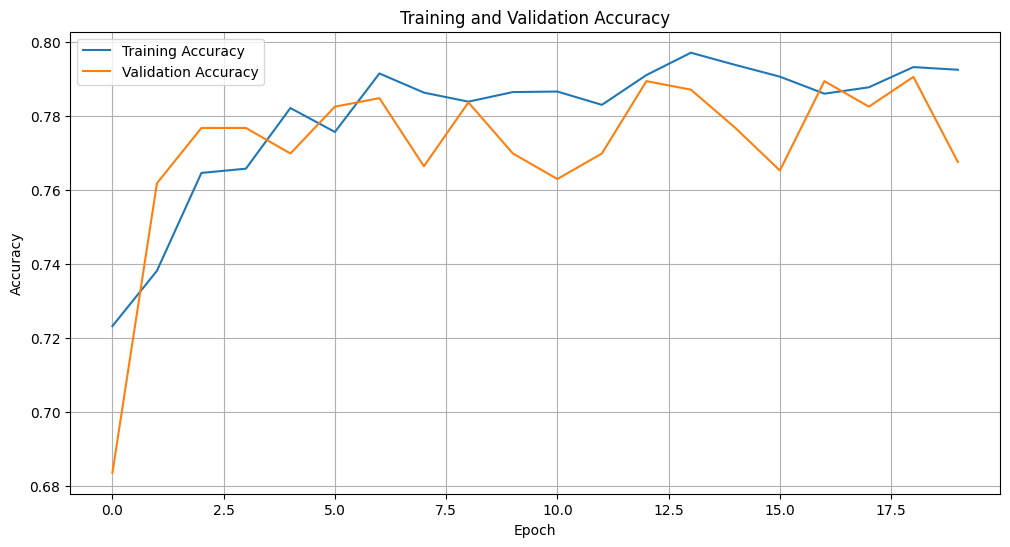

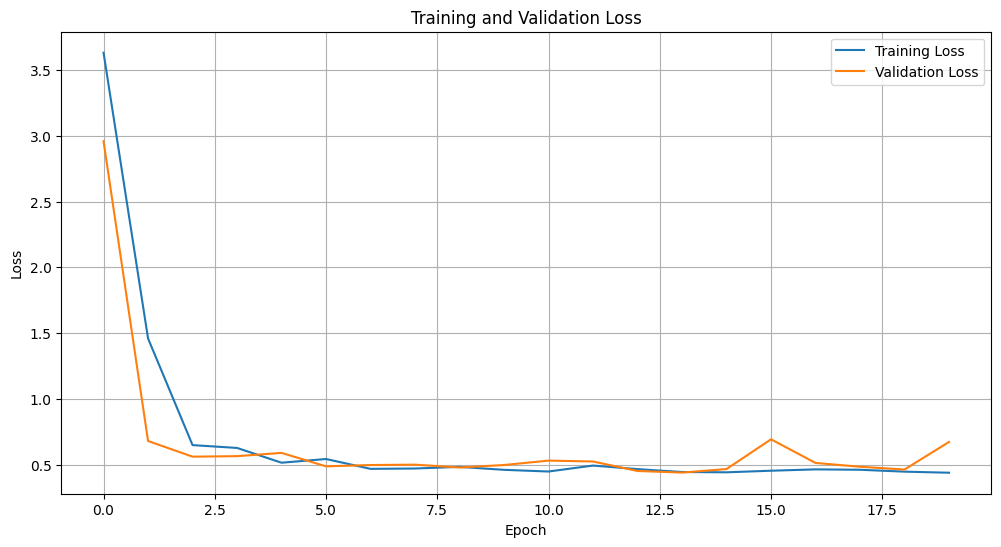

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_test_pred = model1.predict(df_test_1)
y_test_pred

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[5.5088913e-01],
       [5.7478680e-04],
       [9.9996263e-01],
       ...,
       [9.9662894e-01],
       [9.0531349e-01],
       [9.9981922e-01]], dtype=float32)

In [ ]:
y_test_pred = (y_test_pred > 0.5).astype(bool)

In [ ]:
df_test_1.head(n=5)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,TotalSpent,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,True,27.0,False,0.0,0.0,0.0,0.0,0.0,3,0.0,...,False,True,False,False,False,False,False,True,False,True
1,False,19.0,False,0.0,9.0,0.0,2823.0,0.0,4,2832.0,...,False,True,False,False,False,False,True,False,False,True
2,True,31.0,False,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,True,False,False,False,False,False,True
3,False,38.0,False,0.0,6652.0,0.0,181.0,585.0,1,7418.0,...,False,True,False,True,False,False,False,False,False,True
4,False,20.0,False,10.0,0.0,635.0,0.0,0.0,5,645.0,...,False,True,False,False,False,False,True,False,False,True


In [ ]:
df2 = pd.DataFrame({'PassengerId': passengerId_test_1, 'Transported': y_test_pred.flatten()})
df2.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
